In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
hw = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [12]:
df_main = pd.read_csv('hw.csv')
df_main

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [13]:
base = ['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [14]:
df = df_main[base]

In [15]:
df

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


# Q 1 Answer

In [17]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Q 2 Answer

In [20]:
df['minimum_nights'].median()

3.0

In [25]:
price = np.log1p(df.price)
price

0        5.010635
1        5.420535
2        5.017280
3        4.499810
4        4.394449
           ...   
48890    4.262680
48891    3.713572
48892    4.753590
48893    4.025352
48894    4.510860
Name: price, Length: 48895, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

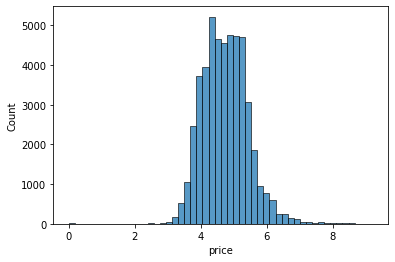

In [27]:
sns.histplot(price, bins=50)

In [28]:
n = len(df)

n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

In [29]:
n, n_val + n_test + n_train

(48895, 48895)

In [30]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train: n_train  + n_val]
df_test  = df.iloc[n_train  + n_val:]

In [31]:
idx = np.arange(n)

In [118]:
np.random.seed(42)
np.random.shuffle(idx)

In [119]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train  + n_val]]
df_test  = df.iloc[idx[n_train  + n_val:]]

In [120]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23088,40.70001,-73.98969,325,2,94,3.67,1,166
1611,40.71141,-73.95427,95,2,164,2.07,2,93
36134,40.66420,-73.99338,160,2,51,5.39,1,15
46735,40.75920,-73.98894,650,3,3,3.00,1,232
35591,40.67604,-73.95775,215,2,14,1.45,1,13


In [121]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)

In [123]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [124]:
del df_train['price']
del df_val['price']
del df_test['price']

In [125]:
df_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.70001,-73.98969,2,94,3.67,1,166
1,40.71141,-73.95427,2,164,2.07,2,93
2,40.66420,-73.99338,2,51,5.39,1,15
3,40.75920,-73.98894,3,3,3.00,1,232
4,40.67604,-73.95775,2,14,1.45,1,13
...,...,...,...,...,...,...,...
29332,40.73512,-73.99445,3,2,1.62,1,9
29333,40.82443,-73.95265,3,2,0.06,2,88
29334,40.82843,-73.94672,3,4,0.16,1,0
29335,40.58985,-73.98482,2,25,1.34,1,0


In [126]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [127]:
df_train.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [128]:
base_model = ['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [129]:
df_train[base_model]

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2,94,3.67,1,166
1,2,164,2.07,2,93
2,2,51,5.39,1,15
3,3,3,3.00,1,232
4,2,14,1.45,1,13
...,...,...,...,...,...
29332,3,2,1.62,1,9
29333,3,2,0.06,2,88
29334,3,4,0.16,1,0
29335,2,25,1.34,1,0


In [130]:
X_train = df_train[base_model].values
X_train

array([[2.00e+00, 9.40e+01, 3.67e+00, 1.00e+00, 1.66e+02],
       [2.00e+00, 1.64e+02, 2.07e+00, 2.00e+00, 9.30e+01],
       [2.00e+00, 5.10e+01, 5.39e+00, 1.00e+00, 1.50e+01],
       ...,
       [3.00e+00, 4.00e+00, 1.60e-01, 1.00e+00, 0.00e+00],
       [2.00e+00, 2.50e+01, 1.34e+00, 1.00e+00, 0.00e+00],
       [2.00e+00, 8.90e+01, 5.59e+00, 1.00e+00, 3.50e+01]])

In [131]:
y_train

array([5.78689738, 4.56434819, 5.08140436, ..., 4.61512052, 4.02535169,
       4.79579055])

In [132]:
df_train[base_model].isnull().sum()

minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 6017
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [133]:
X_train = df_train[base_model].fillna(0).values

X_train_mean = df_train[base_model].fillna(df_train.mean()).values

X_train, X_train_mean

(array([[2.00e+00, 9.40e+01, 3.67e+00, 1.00e+00, 1.66e+02],
        [2.00e+00, 1.64e+02, 2.07e+00, 2.00e+00, 9.30e+01],
        [2.00e+00, 5.10e+01, 5.39e+00, 1.00e+00, 1.50e+01],
        ...,
        [3.00e+00, 4.00e+00, 1.60e-01, 1.00e+00, 0.00e+00],
        [2.00e+00, 2.50e+01, 1.34e+00, 1.00e+00, 0.00e+00],
        [2.00e+00, 8.90e+01, 5.59e+00, 1.00e+00, 3.50e+01]]),
 array([[2.00e+00, 9.40e+01, 3.67e+00, 1.00e+00, 1.66e+02],
        [2.00e+00, 1.64e+02, 2.07e+00, 2.00e+00, 9.30e+01],
        [2.00e+00, 5.10e+01, 5.39e+00, 1.00e+00, 1.50e+01],
        ...,
        [3.00e+00, 4.00e+00, 1.60e-01, 1.00e+00, 0.00e+00],
        [2.00e+00, 2.50e+01, 1.34e+00, 1.00e+00, 0.00e+00],
        [2.00e+00, 8.90e+01, 5.59e+00, 1.00e+00, 3.50e+01]]))

In [134]:
w0, w =train_linear_regression(X_train, y_train)
w0_mean, w_mean =train_linear_regression(X_train_mean, y_train)

In [135]:
y_pred = w0 + X_train.dot(w)
y_pred_mean = w0 + X_train_mean.dot(w)

In [136]:
y_pred, y_pred_mean

(array([4.66471623, 4.67935761, 4.55335565, ..., 4.70152213, 4.66623118,
        4.55402621]),
 array([4.66471623, 4.67935761, 4.55335565, ..., 4.70152213, 4.66623118,
        4.55402621]))

In [137]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [138]:
def prepare_x(df):
    df_num = df[base_model]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def prepare_x_mean(df):
    df_num = df[base_model]
    df_num = df_num.fillna(df_train.mean())
    X = df_num.values
    return X

In [139]:
X_train = prepare_x(df_train)
w0, w =train_linear_regression(X_train, y_train)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

In [162]:
score = rmse(y_val, y_pred)
score = round(score, 2)
score

0.69

In [141]:
X_train_mean = prepare_x_mean(df_train)
w0, w =train_linear_regression(X_train_mean, y_train)

X_val = prepare_x(df_val)
y_pred_mean = w0 + X_val.dot(w)

In [163]:
score_mean =  rmse(y_val, y_pred_mean)
score_mean = round(score_mean, 2)
score_mean 

0.69

# Q 3 Answer

In [164]:
score, score_mean

(0.69, 0.69)

In [148]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [149]:
X_train = prepare_x(df_train)

w0, w =train_linear_regression_reg(X_train, y_train, r = 0.001)

X_val = prepare_x(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.6889932973762778

In [157]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_x(df_train)

    w0, w =train_linear_regression_reg(X_train, y_train, r = r)

    X_val = prepare_x(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    score = round(score, 2)
    
    print(r, w0, score)

0 4.7044224367931 0.69
1e-06 4.704422436452397 0.69
0.0001 4.704422402723227 0.69
0.001 4.704422096094426 0.69
0.01 4.7044190298086805 0.69
0.1 4.704388367176861 0.69
1 4.704081763424641 0.69
5 4.702719576296452 0.69
10 4.7010179808118115 0.69
